In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [2]:
# pandas options
pd.set_option("mode.copy_on_write", True)
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 6

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

# Song rankings for Billboard Top 100 songs in 2000

In [3]:
billboard = pd.read_csv("../data/billboard.csv")
display(billboard)

,artist,track,date_entered,wk1,wk2,wk3,wk4,wk5,wk6,wk7,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2 Pac,Baby Don't Cry (Keep...,2000-02-26,87,82.00,72.00,77.00,87.00,94.00,99.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2Ge+her,The Hardest Part Of ...,2000-09-02,91,87.00,92.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3 Doors Down,Kryptonite,2000-04-08,81,70.00,68.00,67.00,66.00,57.00,54.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Ying Yang Twins,Whistle While You Tw...,2000-03-18,95,94.00,91.00,85.00,84.00,78.00,74.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,Zombie Nation,Kernkraft 400,2000-09-02,99,99.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,matchbox twenty,Bent,2000-04-29,60,37.00,29.00,24.00,22.00,21.00,18.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 동명이인이 없다고 가정했을 때, 총 몇명의 가수(artist)가 차트에 있으며, 가수별로 몇 곡(track)이 있는지

In [4]:
billboard.value_counts('artist')

artist
Jay-Z                5
Houston, Whitney     4
Dixie Chicks, The    4
                    ..
Hollister, Dave      1
Hot Boys             1
matchbox twenty      1
Length: 228, dtype: int64

### 곡 명은 같지만, 가수가 다른 곡이 있는지 확인하고, 서로 다른 노래가 몇개가 있는지

In [5]:
billboard.value_counts('track').reset_index(name='cnt').query('cnt > 1')
# track을 기준으로 count를 센 뒤 count가 1보다 큰 것만 추출

,track,cnt
0,Where I Wanna Be,2


In [6]:
billboard.groupby(['artist', 'track']).size()
# aritst와 track을 기준으로 그룹화한 뒤 size를 구한 뒤 길이를 구하면 서로다른 노래의 개수를 구할 수 있다.

artist           track                  
2 Pac            Baby Don't Cry (Keep...    1
2Ge+her          The Hardest Part Of ...    1
3 Doors Down     Kryptonite                 1
                                           ..
Ying Yang Twins  Whistle While You Tw...    1
Zombie Nation    Kernkraft 400              1
matchbox twenty  Bent                       1
Length: 317, dtype: int64

### 주 (week)에 대해 long format으로 변환

In [7]:
billboard_long = (
    billboard
    .melt(id_vars=billboard.columns[:3], var_name='wk', value_name='rank')
    .sort_values(['artist', 'track'])
)
billboard_long['wk'] = billboard_long['wk'].str.replace('wk', '').astype(int) # wk column에 대해 숫자로 표현
billboard_long.dropna(subset='rank', inplace=True) # rank가 NaN인 것을 제거
display(billboard_long)

,artist,track,date_entered,wk,rank
0,2 Pac,Baby Don't Cry (Keep...,2000-02-26,1,87.00
317,2 Pac,Baby Don't Cry (Keep...,2000-02-26,2,82.00
634,2 Pac,Baby Don't Cry (Keep...,2000-02-26,3,72.00
...,...,...,...,...,...
11728,matchbox twenty,Bent,2000-04-29,37,38.00
12045,matchbox twenty,Bent,2000-04-29,38,38.00
12362,matchbox twenty,Bent,2000-04-29,39,48.00


### 50주 이상 머무른 곡 추출

In [8]:
wks_50 = (
    billboard_long.groupby(['artist', 'track'], as_index=False)
    .size() # 머문 기간에 대해 .size()를 통해 구함
    .sort_values('size', ascending=False)
    .query('size >= 50') # 50주 이상 머문 것만 추출
)

display(wks_50)

,artist,track,size
62,Creed,Higher,57
179,Lonestar,Amazed,55
121,"Hill, Faith",Breathe,53
2,3 Doors Down,Kryptonite,53


### 50주 이상 머무르는 곡들에 대해 주별로 랭킹 변화를 시각화

In [9]:
wks_50_all = (
    billboard_long
    .merge(wks_50) # wks_50에 대해 merge
)
display(wks_50_all)

,artist,track,date_entered,wk,rank,size
0,3 Doors Down,Kryptonite,2000-04-08,1,81.00,53
1,3 Doors Down,Kryptonite,2000-04-08,2,70.00,53
2,3 Doors Down,Kryptonite,2000-04-08,3,68.00,53
...,...,...,...,...,...,...
215,Lonestar,Amazed,1999-06-05,62,42.00,55
216,Lonestar,Amazed,1999-06-05,63,45.00,55
217,Lonestar,Amazed,1999-06-05,64,50.00,55


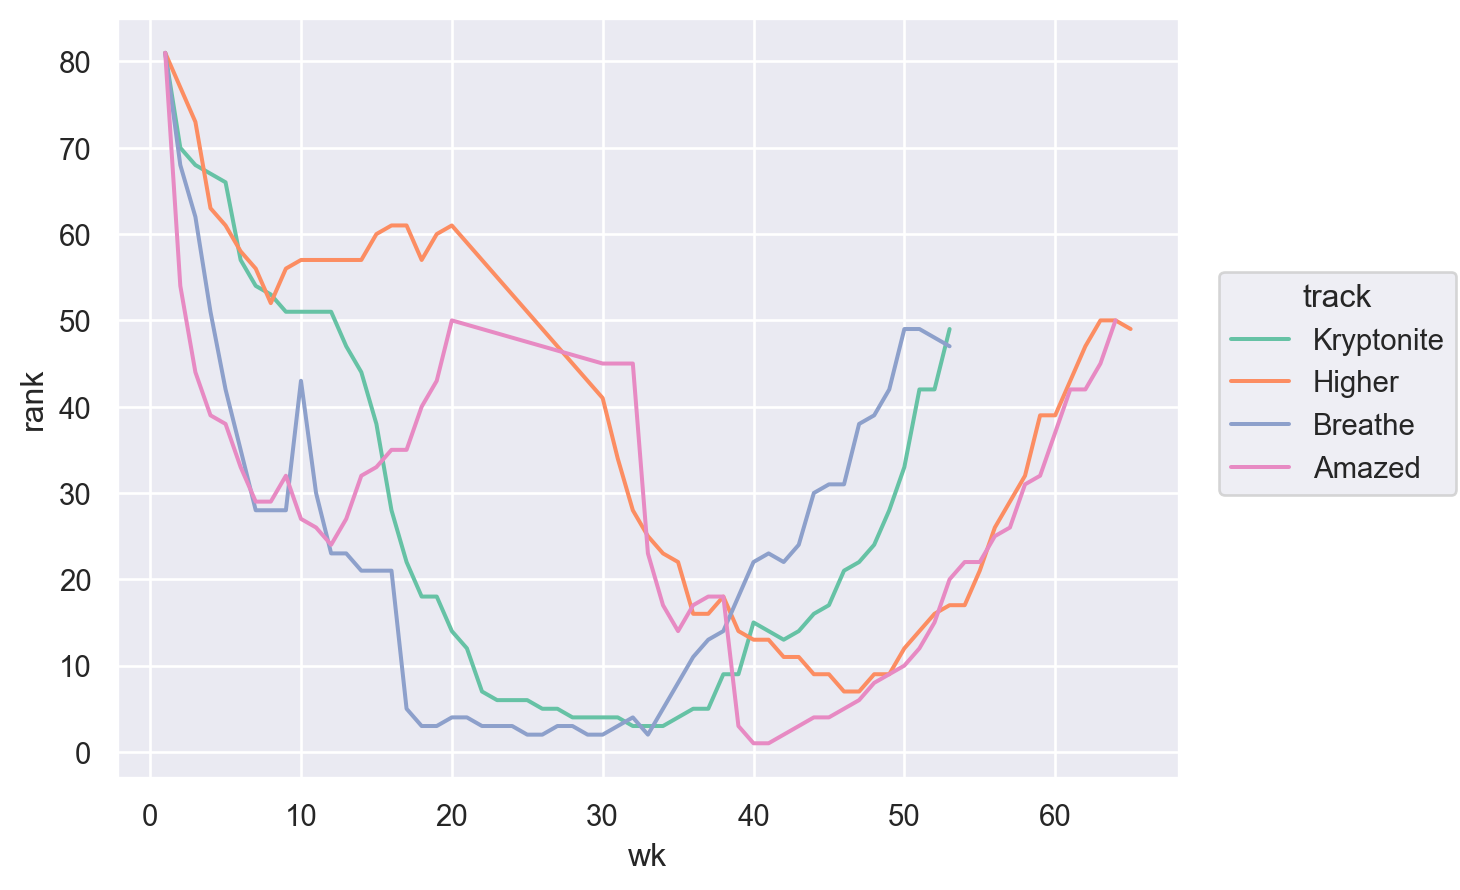

In [10]:
(
    so.Plot(wks_50_all, x='wk', y='rank', color = 'track')
    .add(so.Line())
    .scale(color='Set2')
)
# wk에 관한 rank의 변화 시각화

### 곡 별로 차트에 머문 기간을 추출

In [11]:
lengths = (
    billboard_long
    .groupby(['artist', 'track'])
    .size()
    .reset_index(name='length')
)

display(lengths)

,artist,track,length
0,2 Pac,Baby Don't Cry (Keep...,7
1,2Ge+her,The Hardest Part Of ...,3
2,3 Doors Down,Kryptonite,53
...,...,...,...
314,Ying Yang Twins,Whistle While You Tw...,14
315,Zombie Nation,Kernkraft 400,2
316,matchbox twenty,Bent,39


### 곡 별로 최상위 순위를 추출

In [12]:
highs = (
    billboard_long
    .groupby(['artist', 'track'])['rank']
    .min() # 각 track이 도달했던 최상위 순위
    .reset_index(name='high')
)

display(highs)

,artist,track,high
0,2 Pac,Baby Don't Cry (Keep...,72.00
1,2Ge+her,The Hardest Part Of ...,87.00
2,3 Doors Down,Kryptonite,3.00
...,...,...,...
314,Ying Yang Twins,Whistle While You Tw...,74.00
315,Zombie Nation,Kernkraft 400,99.00
316,matchbox twenty,Bent,1.00


### 곡 별로 주의 길이와 최상위 순위를 merge

In [13]:
lengths_high = pd.merge(lengths, highs) # merge를 통해 곡 별 주의 길이와 최상위 순위의 데이터를 합침
display(lengths_high)

,artist,track,length,high
0,2 Pac,Baby Don't Cry (Keep...,7,72.00
1,2Ge+her,The Hardest Part Of ...,3,87.00
2,3 Doors Down,Kryptonite,53,3.00
...,...,...,...,...
314,Ying Yang Twins,Whistle While You Tw...,14,74.00
315,Zombie Nation,Kernkraft 400,2,99.00
316,matchbox twenty,Bent,39,1.00


### 머문 기간에 따른 최상위 순위에 대한 관계 시각화

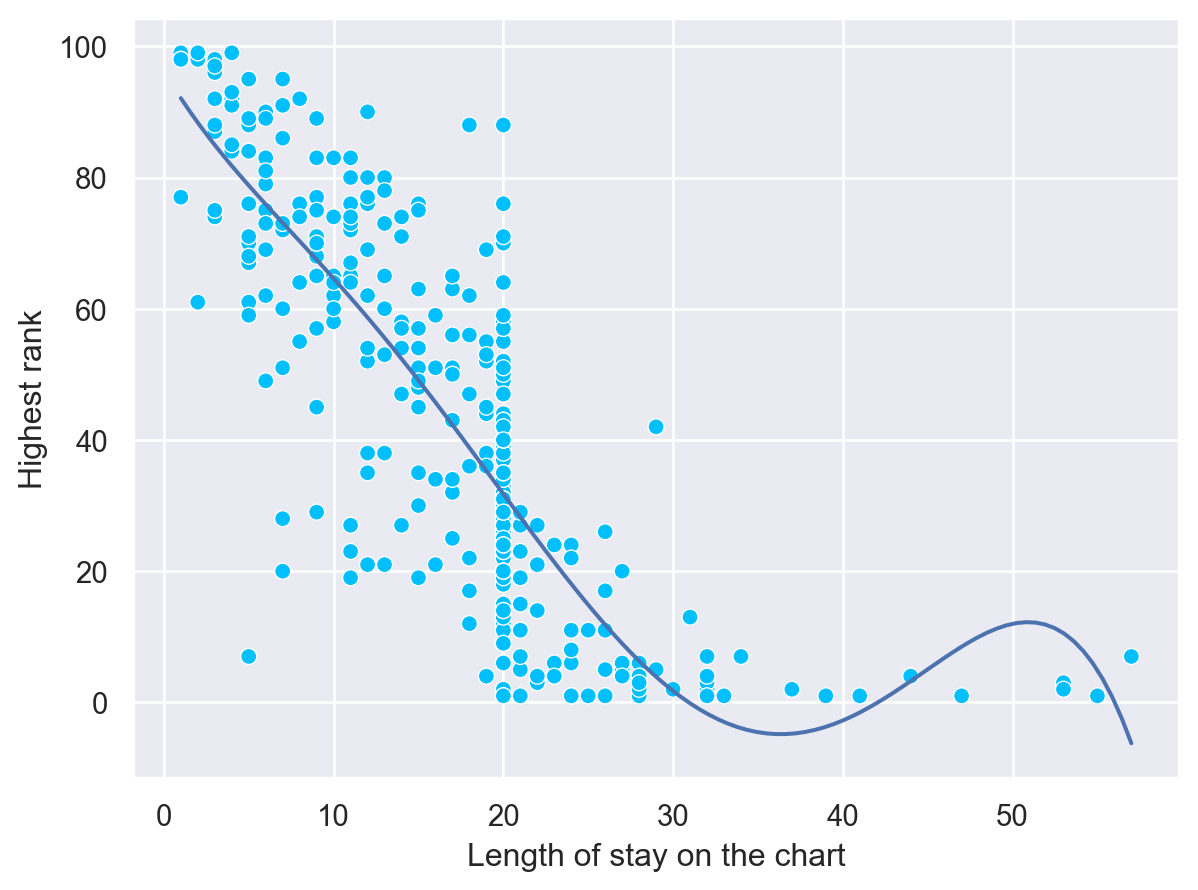

In [14]:
(
    so.Plot(lengths_high, x='length', y='high')
    .add(so.Dot(color='deepskyblue', edgecolor='white'))
    .add(so.Line(), so.PolyFit(5))
    .label(x='Length of stay on the chart', y='Highest rank')
)

### 1위를 달성한 곡들에 대해, 차트에 진입 시 순위와 처음 1위를 도달한 주의 정보만을 추출

In [15]:
def isranked(df, n=1):
    if df['rank'].min() == n: # rank의 값이 1이면 True
        idx = df['rank'].argmin() # rank의 최소값의 index를 구함
        return df.iloc[[0, idx], -2:] # 0번째와 최소값의 index에 해당하는 artist와 track을 반환

In [16]:
wk_rank = (
    billboard_long.groupby(['artist', 'track'])
    .apply(isranked)
    .reset_index()
    .drop(columns = 'level_2') # level_2 column을 제거
)

display(wk_rank)

,artist,track,wk,rank
0,Aaliyah,Try Again,1,59.00
1,Aaliyah,Try Again,14,1.00
2,"Aguilera, Christina",Come On Over Baby (A...,1,57.00
...,...,...,...,...
31,Vertical Horizon,Everything You Want,26,1.00
32,matchbox twenty,Bent,1,60.00
33,matchbox twenty,Bent,13,1.00


### 빠르게 1위가 된 곡일 수록 빠르게 차트에서 사랴졌는지에 대해 알아보기 위해 테이블 변환

In [17]:
wk_rank.groupby(['artist', 'track']).max() 
# artist와 track을 기준으로 그룹화한 뒤 최대값을 구해 차트인 시의 순위와 1위를 처음 달성한 주의 데이터를 합침

wk  rank
artist              track                            
Aaliyah             Try Again                14 59.00
Aguilera, Christina Come On Over Baby (A...  11 57.00
                    What A Girl Wants         8 71.00
...                                          ..   ...
Sisqo               Incomplete                8 77.00
Vertical Horizon    Everything You Want      26 70.00
matchbox twenty     Bent                     13 60.00

[17 rows x 2 columns]

In [18]:
rates = (
    wk_rank.groupby(['artist', 'track'])
    .max()
    .assign(rate = lambda x: x['rank'] / x['wk']) # 비율을 구함
    .reset_index()
)

display(rates)

,artist,track,wk,rank,rate
0,Aaliyah,Try Again,14,59.00,4.21
1,"Aguilera, Christina",Come On Over Baby (A...,11,57.00,5.18
2,"Aguilera, Christina",What A Girl Wants,8,71.00,8.88
...,...,...,...,...,...
14,Sisqo,Incomplete,8,77.00,9.62
15,Vertical Horizon,Everything You Want,26,70.00,2.69
16,matchbox twenty,Bent,13,60.00,4.62


In [19]:
lengths = (
    billboard_long
    .groupby(['artist', 'track'])
    .size()
    .reset_index(name='length')
)

display(lengths)

,artist,track,length
0,2 Pac,Baby Don't Cry (Keep...,7
1,2Ge+her,The Hardest Part Of ...,3
2,3 Doors Down,Kryptonite,53
...,...,...,...
314,Ying Yang Twins,Whistle While You Tw...,14
315,Zombie Nation,Kernkraft 400,2
316,matchbox twenty,Bent,39


In [20]:
lengths_rates = pd.merge(rates, lengths)

display(lengths_rates)

,artist,track,wk,rank,rate,length
0,Aaliyah,Try Again,14,59.00,4.21,32
1,"Aguilera, Christina",Come On Over Baby (A...,11,57.00,5.18,21
2,"Aguilera, Christina",What A Girl Wants,8,71.00,8.88,24
...,...,...,...,...,...,...
14,Sisqo,Incomplete,8,77.00,9.62,26
15,Vertical Horizon,Everything You Want,26,70.00,2.69,41
16,matchbox twenty,Bent,13,60.00,4.62,39


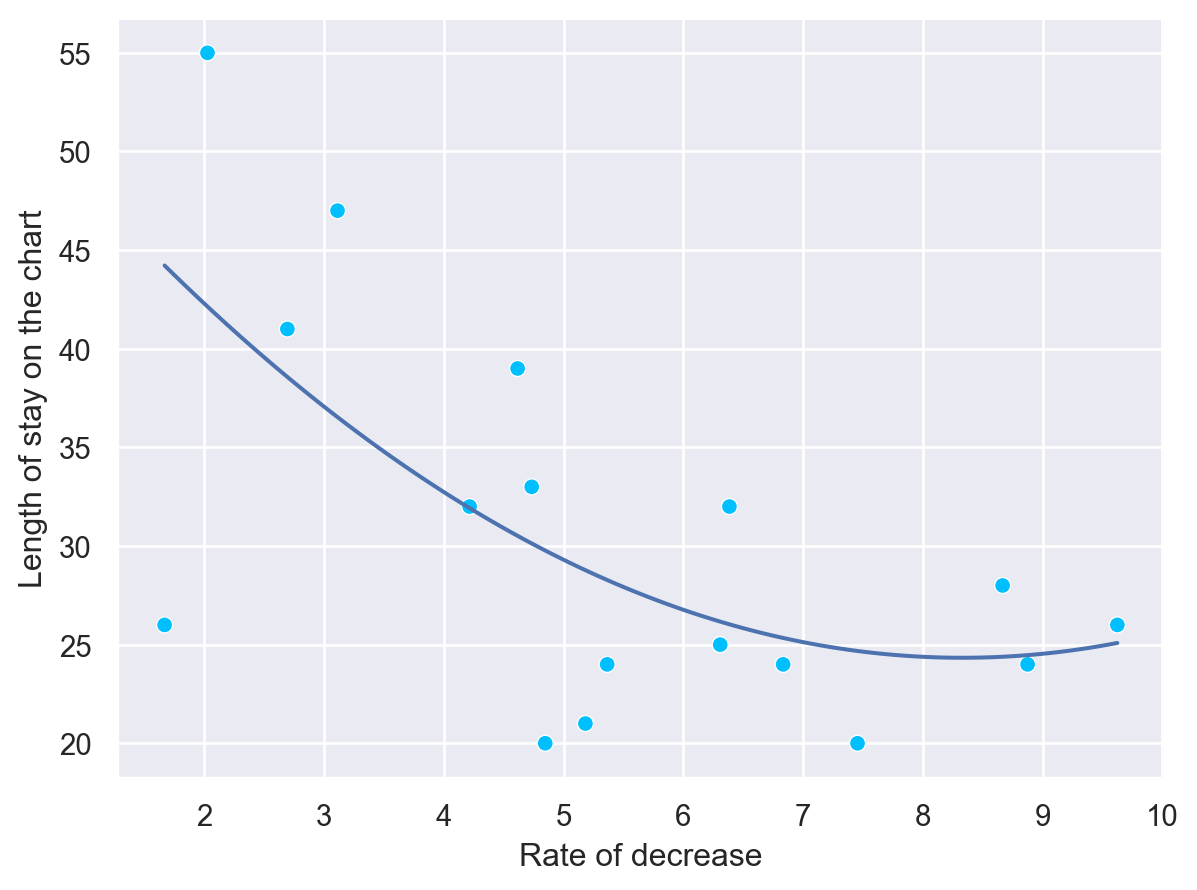

In [21]:
(
    so.Plot(lengths_rates, x='rate', y='length')
    .add(so.Dot(color='deepskyblue', edgecolor='white'))
    .add(so.Line(), so.PolyFit(2))
    .label(x='Rate of decrease', y='Length of stay on the chart')
)